<a href="https://colab.research.google.com/github/joeljohn6282/classification/blob/main/Loan_sataus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAN  APPROVAL STATUS PREDICTION**

Imagine you are work in bank sector and bank provides loan to the customer
who requires so when provides loans the is a risk whether the loan take will repay the loan or not . so the bank have look after many aspects.
so this project to predict whether loan is approved or not as per customer profile

## **Importing Required Libraries For Execution**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler


# **Loading The Daata Set**

In [ ]:
df=pd.read_csv('/content/LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Analysis Of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [ ]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## **Analysis Data Through Visuals**

<ipython-input-758-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

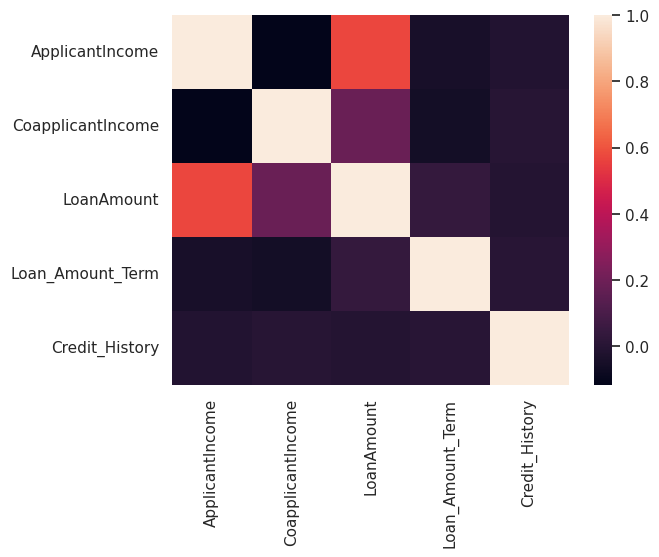

In [ ]:
sns.heatmap(df.corr())

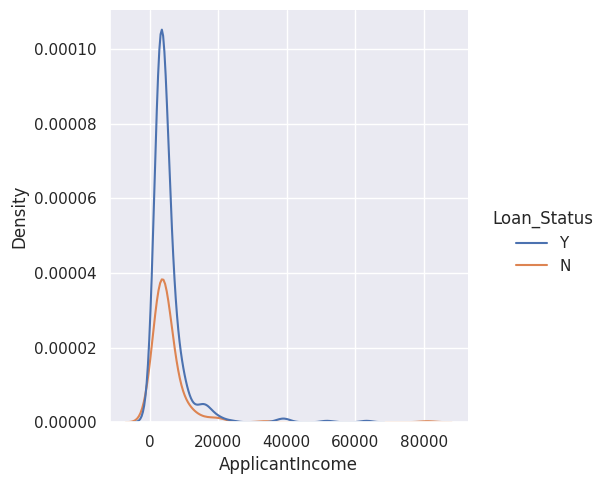

In [ ]:
sns.displot(df,x='ApplicantIncome',hue='Loan_Status',kind='kde')

<Axes: xlabel='Married', ylabel='count'>

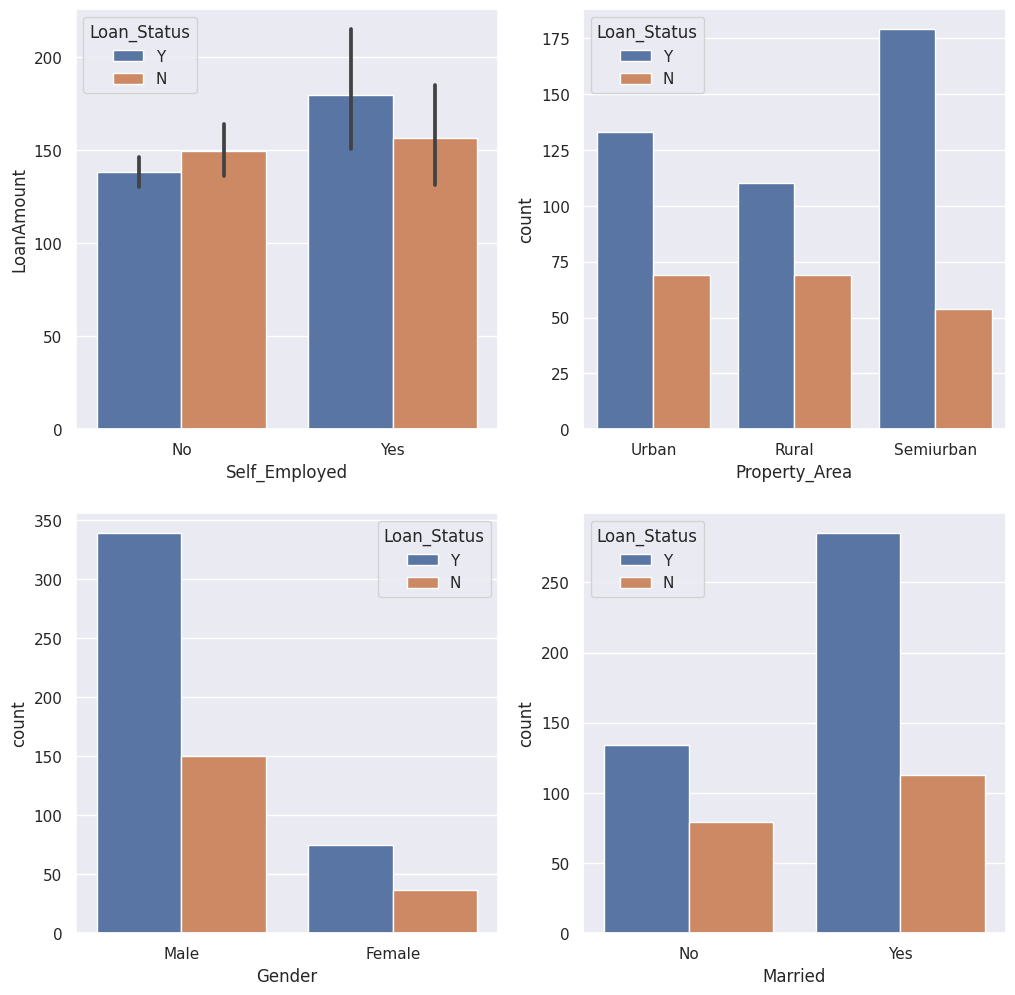

In [ ]:
fig,axis=plt.subplots(2,2,figsize=(12,12))
sns.barplot(x='Self_Employed',y='LoanAmount',data=df,hue='Loan_Status',ax=axis[0,0])
sns.countplot(x='Property_Area',data=df,hue='Loan_Status',ax=axis[0,1])
sns.countplot(x='Gender',data=df,hue='Loan_Status',ax=axis[1,0])
sns.countplot(x='Married',data=df,hue='Loan_Status',ax=axis[1,1])

# **Data Cleaning And Preprocessing**

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
le=LabelEncoder()
lst=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [ ]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# **Checking The DataSet Is  Balnce Or Not**

1    422
0    192
Name: Loan_Status, dtype: int64


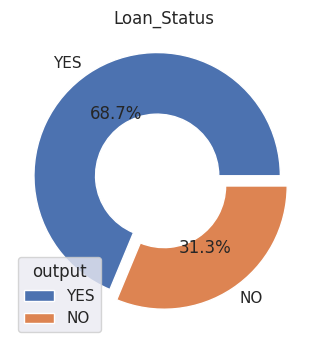

In [ ]:
h=df['Loan_Status'].value_counts()
print(h)
new=['YES','NO',]
plt.figure(figsize=(4,4))
plt.pie(h,explode=[0.1,0],labels=new, autopct='%2.1f%%',wedgeprops={"width":0.5})
plt.title('Loan_Status')
plt.legend(title='output')
plt.show()

# **Seprate X and Y**

In [ ]:
X=df.iloc[:,:-1]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## **Scaling The Featuers**

In [ ]:
ms=MinMaxScaler()
X_new=ms.fit_transform(X)
X_new

array([[0.5       , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.5       , 0.5       , 0.25      , ..., 0.74358974, 1.        ,
        0.        ],
       [0.5       , 0.5       , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [0.5       , 0.5       , 0.25      , ..., 0.74358974, 1.        ,
        1.        ],
       [0.5       , 0.5       , 0.5       , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

# **Spliting The DataSet**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=45)

# **Model Creation**

*   	KNeighborsClassifier
*   svc
*   Naive Bayes
*   DecisionTree
*   AdaBoostClassifier
*   GradientBoosting
*   XGBClassifier












In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()
score=[]
models=[knn,svm,nb,dc,ad,gr,xg]

for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  model_score=accuracy_score(y_test,y_pred)*100
  print(model_score)
  print('_'*60)
  score.append(model_score)


******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.95      0.40      0.56        45
           1       0.74      0.99      0.85        78

    accuracy                           0.77       123
   macro avg       0.84      0.69      0.70       123
weighted avg       0.82      0.77      0.74       123

77.23577235772358
____________________________________________________________
******************** SVC() ********************
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        45
           1       0.74      1.00      0.85        78

    accuracy                           0.77       123
   macro avg       0.87      0.69      0.70       123
weighted avg       0.83      0.77      0.74       123

77.23577235772358
____________________________________________________________
******************** GaussianNB() ********************
              precis

# **Data Frame Of Accuracy Of Each Model**

In [ ]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score
Data=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,77.235772
2,svc,77.235772
3,Naive,79.674797
4,DecisionTree,66.666667
5,AdaBoostClassifier,78.048780
6,GradientBoosting,74.796748
7,XGBClassifier,74.796748


# **Inbalanced Dtaset Handling Using SMOTEENN**

In [ ]:
sm=SMOTEENN(random_state=1)
X_sm,y_sm=sm.fit_resample(X_new,y)

0    241
1    218
Name: Loan_Status, dtype: int64


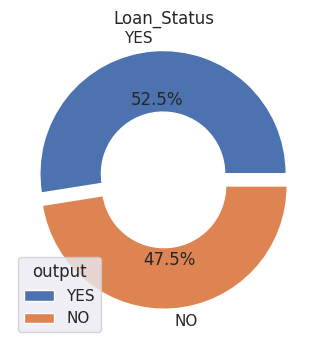

In [ ]:
h1=y_sm.value_counts()
print(h1)
new=['YES','NO',]
plt.figure(figsize=(4,4))
plt.pie(h1,explode=[0.1,0],labels=new, autopct='%2.1f%%',wedgeprops={"width":0.5})
plt.title('Loan_Status')
plt.legend(title='output')
plt.show()

In [ ]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=45)

In [ ]:

knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg_bal=XGBClassifier()
score1=[]
models=[knn,svm,nb,dc,ad,gr,xg_bal]

for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_train_sm,y_train_sm)
  y_pred_sm=model.predict(X_test_sm)
  print(classification_report(y_test_sm,y_pred_sm))
  model_score=accuracy_score(y_test_sm,y_pred_sm)*100
  print(model_score)
  print('_'*60)
  score1.append(model_score)



******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.98      0.96      0.97        45

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92

96.73913043478261
____________________________________________________________
******************** SVC() ********************
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        47
           1       0.83      1.00      0.91        45

    accuracy                           0.90        92
   macro avg       0.92      0.90      0.90        92
weighted avg       0.92      0.90      0.90        92

90.21739130434783
____________________________________________________________
******************** GaussianNB() ********************
              precis

In [ ]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score1
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,96.739130
2,svc,90.217391
3,Naive,84.782609
4,DecisionTree,94.565217
5,AdaBoostClassifier,91.304348
6,GradientBoosting,94.565217
7,XGBClassifier,97.826087


# **Principle Component Analysis (PCA)**

In [ ]:
pca=PCA(n_components=9)
X_trainpca=pca.fit_transform(X_train)
X_testpca=pca.fit_transform(X_test)
X_trainpca

array([[-0.39874192,  0.39337066,  0.1094115 , ...,  0.50334576,
        -0.14273532,  0.83996252],
       [ 0.67734033,  0.21041575, -0.32553651, ...,  0.0033517 ,
         0.27059585,  0.26678406],
       [-0.25544165, -0.13703489, -0.11481208, ...,  0.2292167 ,
        -0.01987942,  0.01316419],
       ...,
       [ 0.87229448, -0.23584219, -0.20536202, ...,  0.02175552,
        -0.05299792,  0.01165341],
       [ 0.65884931,  0.18033038, -0.4217881 , ..., -0.4466831 ,
        -0.03856763,  0.03048569],
       [ 0.89865888,  0.3819896 ,  0.47285395, ..., -0.48273674,
        -0.06203113,  0.12808145]])

In [ ]:

knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()
score2=[]
models=[knn,svm,nb,dc,ad,gr,xg]

for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_trainpca,y_train)
  y_predpca=model.predict(X_testpca)
  print(classification_report(y_test,y_pred))
  model_score=accuracy_score(y_test,y_predpca)*100
  print(model_score)
  print('_'*60)
  score2.append(model_score)

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.82      0.40      0.54        45
           1       0.73      0.95      0.83        78

    accuracy                           0.75       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.76      0.75      0.72       123

73.98373983739837
____________________________________________________________
******************** SVC() ********************
              precision    recall  f1-score   support

           0       0.82      0.40      0.54        45
           1       0.73      0.95      0.83        78

    accuracy                           0.75       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.76      0.75      0.72       123

72.35772357723577
____________________________________________________________
******************** GaussianNB() ********************
              precis

In [ ]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score2
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,73.983740
2,svc,72.357724
3,Naive,75.609756
4,DecisionTree,58.536585
5,AdaBoostClassifier,71.544715
6,GradientBoosting,68.292683
7,XGBClassifier,66.666667


# **Detecting Outliers**

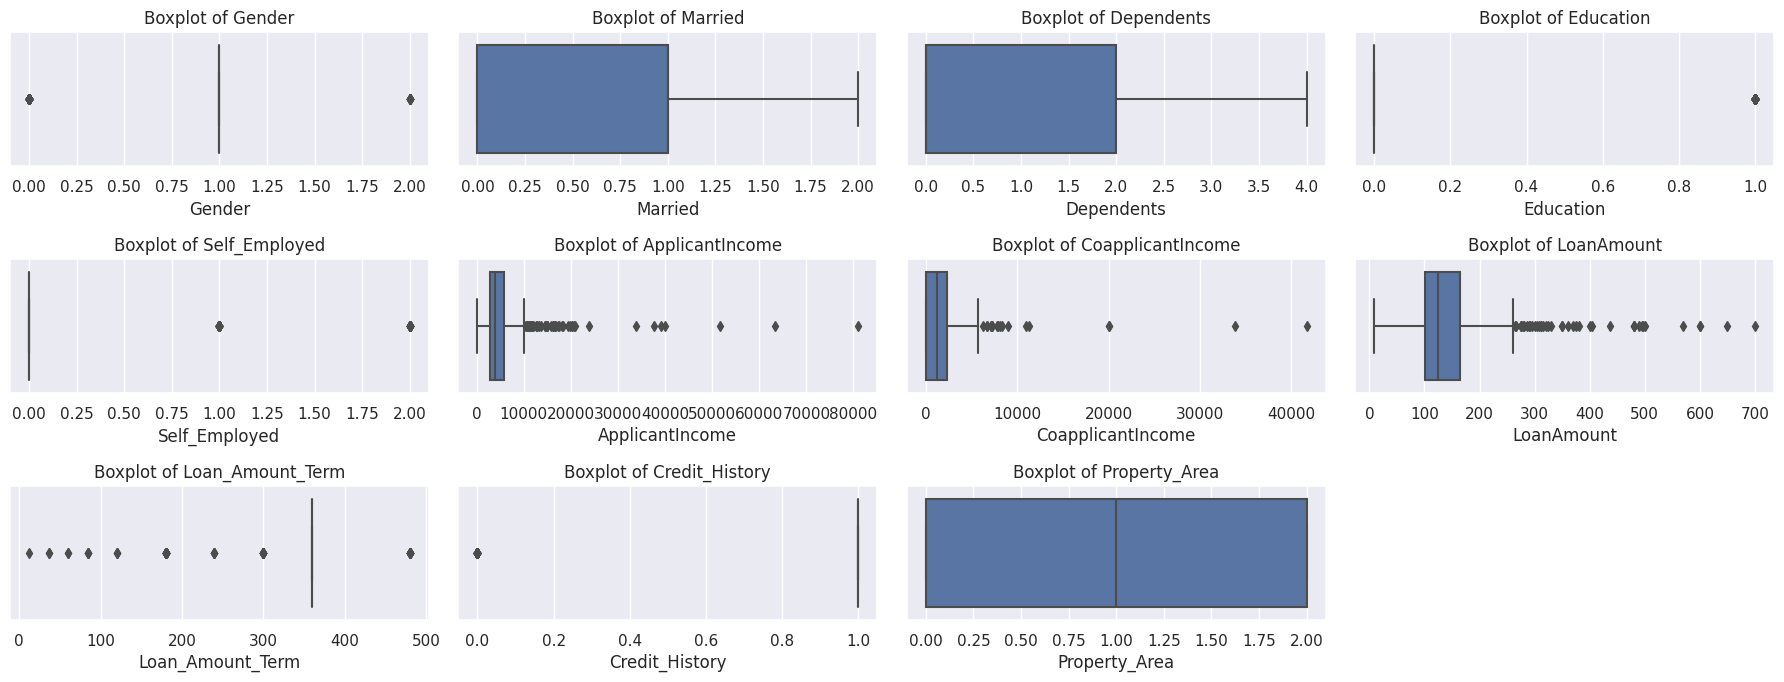

In [ ]:
feautures=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
plt.figure(figsize=(18,11))
for i,j in zip(range(1,18),feautures):
  plt.subplot(5,4,i)
  sns.boxplot(data=df,x=j)
  plt.tight_layout()
  sns.set_theme()
  plt.title('Boxplot of {}'.format(j))

**So, find outliers in  Gender,Education,
Self_Employed,ApplicantIncome,
CoapplicantIncome,
LoanAmount,Loan_Amount_Term	and
 Credit_History**



# **Remove Outliers**

In [ ]:
df1 = df.copy()
def remove_outliers_IQR (col):
  percentile25 =df1[col].quantile (0.25)
  percentile75 = df1[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 *iqr
  lower_limit = percentile25 - 1.5* iqr
  print("Upper limit", upper_limit)
  print("Lower limit", lower_limit)
  df1[col]=np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit, lower_limit,df1[col]))
  return df1[df1[col]> upper_limit]

In [ ]:
remove_outliers_IQR('Gender')

Upper limit 1.0
Lower limit 1.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
remove_outliers_IQR('Education')

Upper limit 0.0
Lower limit 0.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
remove_outliers_IQR('Self_Employed')

Upper limit 0.0
Lower limit 0.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
remove_outliers_IQR('ApplicantIncome')

Upper limit 10171.25
Lower limit -1498.75


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
remove_outliers_IQR('CoapplicantIncome')

Upper limit 5743.125
Lower limit -3445.875


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
remove_outliers_IQR('LoanAmount')

Upper limit 261.5
Lower limit 3.5


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
remove_outliers_IQR('Loan_Amount_Term')

Upper limit 360.0
Lower limit 360.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
remove_outliers_IQR('Credit_History')

Upper limit 1.0
Lower limit 1.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


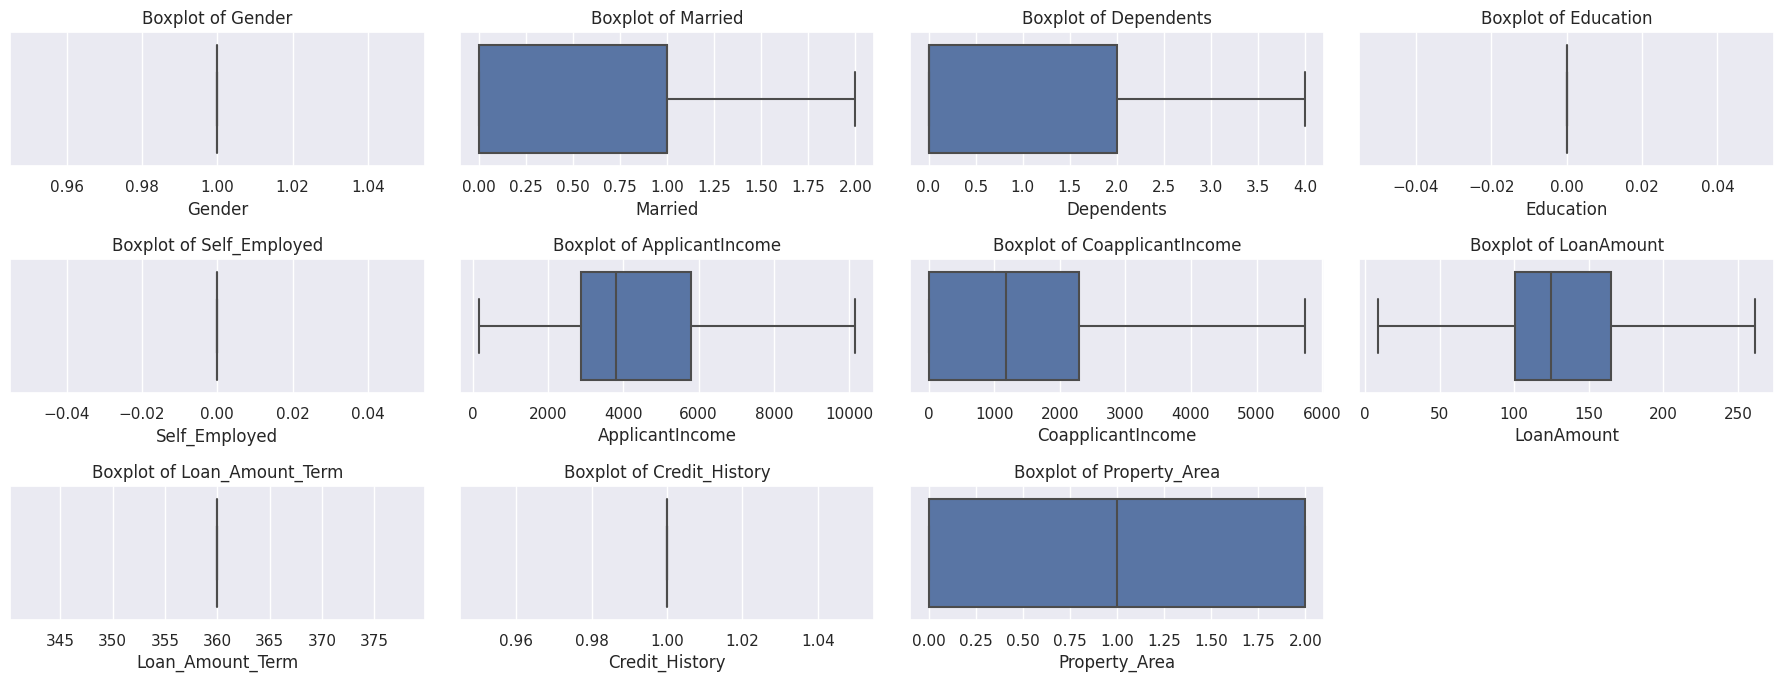

In [ ]:
feautures=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
plt.figure(figsize=(18,11))
for i,j in zip(range(1,18),feautures):
  plt.subplot(5,4,i)
  sns.boxplot(data=df1,x=j)
  plt.tight_layout()
  sns.set_theme()
  plt.title('Boxplot of {}'.format(j))

In [ ]:
X=df1.iloc[:,:-1]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0,0,0.0,0.0,5849.0,0.0,120.0,360.0,1.0,2
1,1.0,1,1,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0
2,1.0,1,0,0.0,0.0,3000.0,0.0,66.0,360.0,1.0,2
3,1.0,1,0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2
4,1.0,0,0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0
610,1.0,1,3,0.0,0.0,4106.0,0.0,40.0,360.0,1.0,0
611,1.0,1,1,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2
612,1.0,1,2,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2


In [ ]:
y=df1.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
mms=MinMaxScaler()
X_sc=mms.fit_transform(X)
X_sc

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.5 , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.5 , 0.25, ..., 0.  , 0.  , 1.  ],
       [0.  , 0.5 , 0.5 , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ]])

In [ ]:
X_trainor,X_testor,y_trainor,y_testor=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:

knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()
score3=[]
models=[knn,svm,nb,dc,ad,gr,xg]

for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_trainpca,y_train)
  y_predpca=model.predict(X_testpca)
  print(classification_report(y_test,y_pred))
  model_score=accuracy_score(y_test,y_predpca)*100
  print(model_score)
  print('_'*60)
  score3.append(model_score)

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.82      0.40      0.54        45
           1       0.73      0.95      0.83        78

    accuracy                           0.75       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.76      0.75      0.72       123

73.98373983739837
____________________________________________________________
******************** SVC() ********************
              precision    recall  f1-score   support

           0       0.82      0.40      0.54        45
           1       0.73      0.95      0.83        78

    accuracy                           0.75       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.76      0.75      0.72       123

72.35772357723577
____________________________________________________________
******************** GaussianNB() ********************
              precis

# **Combaring Acuuracy**

In [ ]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score3
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,73.983740
2,svc,72.357724
3,Naive,75.609756
4,DecisionTree,65.040650
5,AdaBoostClassifier,71.544715
6,GradientBoosting,69.105691
7,XGBClassifier,66.666667


In [ ]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score
Accuracy1=score1
Accuracy2=score2
Accuracy3=score3
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy,'Balancing':Accuracy1,'PCA':Accuracy2,'Outlier':Accuracy3},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Balancing',color='lightgreen')

,Algorithm,Accuracy,Balancing,PCA,Outlier
1,KNeighborsClassifier,77.235772,96.739130,73.983740,73.983740
2,svc,77.235772,90.217391,72.357724,72.357724
3,Naive,79.674797,84.782609,75.609756,75.609756
4,DecisionTree,66.666667,94.565217,58.536585,65.040650
5,AdaBoostClassifier,78.048780,91.304348,71.544715,71.544715
6,GradientBoosting,74.796748,94.565217,68.292683,69.105691
7,XGBClassifier,74.796748,97.826087,66.666667,66.666667


**Save The Good Acuuracy Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(xg_bal,'loan_status_predict')


['loan_status_predict']

In [ ]:
model = joblib.load('loan_status_predict')

# **New Data For Prediction**

In [ ]:
new=pd.DataFrame({
'Gender':0,
'Married':1,
'Dependents':2,
'Education':0,
'Self_Employed':1,
'ApplicantIncome':2869,
'CoapplicantIncome':0.0,
'LoanAmount':35,
'Loan_Amount_Term':140,
'Credit_History':0,
'Property_Area':0
},index=[0])
new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,2,0,1,2869,0.0,35,140,0,0


In [ ]:
result=model.predict(new)

# **New Prediction**

In [ ]:
if result==1:

  print('Loan Approved')
else:
  print('Loan Not Approved')


Loan Not Approved


**Here Develop a Loan approval Status Prediction Using Variety of Techniques
after balancing the data, The XGBClassifier Algorithm yields a High Accuracy of 97.826087**